In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path as P
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['KaiTi', 'SimHei', 'FangSong']  # 汉字字体,优先使用楷体，如果找不到楷体，则使用黑体
plt.rcParams['font.size'] = 12  # 字体大小
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号
from collections import defaultdict
import plotly.express as px
import pickle
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow.keras as keras

In [85]:
learning_rate=0.001
train_size=0.8
bs=4
epochs=500
feature_size=1

YEAR,INTENSITY,BLOCK,SOC,SIC,STC,ALLN,CN=['year', '放牧强度（intensity）', '放牧小区（plot）', 'SOC土壤有机碳', 'SIC土壤无机碳',
       'STC土壤全碳', '全氮N', '土壤C/N比']

In [72]:
df_NUMERIC=pd.read_csv('./问题3-因变量.csv')
scaler=pickle.load(open('./问题3-scaler.pkl','rb'))
df_INPUT=pd.read_csv('./问题3-自变量.csv')


In [73]:
df_NUMERIC.shape, df_INPUT.shape, scaler.mean_, scaler.scale_

((60, 5),
 (60, 13),
 array([14.92006485,  7.51246398, 22.43252883,  1.82556675, 13.00669993]),
 array([1.7068166 , 2.79228173, 2.43835697, 0.21700343, 2.45867866]))

In [74]:
X_train,X_val,Y_train,Y_val=train_test_split(df_INPUT.values, df_NUMERIC.values, train_size=train_size, shuffle=False)

In [75]:
X_train.shape,X_val.shape,Y_train.shape,Y_val.shape

((48, 13), (12, 13), (48, 5), (12, 5))

In [76]:
inputs = keras.layers.Input(shape=(X_train.shape[1], ))
x = keras.layers.Dense(128, activation='relu')(inputs)
# x = keras.layers.Dropout(0.1)(x)
x = keras.layers.Dense(128, activation='relu')(x)
outputs = keras.layers.Dense(Y_train.shape[1])(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 13)]              0         
                                                                 
 dense_25 (Dense)            (None, 128)               1792      
                                                                 
 dense_26 (Dense)            (None, 128)               16512     
                                                                 
 dense_27 (Dense)            (None, 5)                 645       
                                                                 
Total params: 18,949
Trainable params: 18,949
Non-trainable params: 0
_________________________________________________________________


In [77]:
path_checkpoint = "problem3_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=10)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    # 要同时保存网络结构。
    save_weights_only=False,
    save_best_only=True,
)

history = model.fit(
    X_train, Y_train,
    epochs=epochs,
    validation_data=(X_val, Y_val),
    callbacks=[es_callback, modelckpt_callback],
    batch_size=bs
)

Epoch 1/500
 1/12 [=>............................] - ETA: 2s - loss: 0.7806
Epoch 1: val_loss improved from inf to 1.42908, saving model to problem3_checkpoint.h5
12/12 [==============================] - 0s 16ms/step - loss: 0.8388 - val_loss: 1.4291
Epoch 2/500
 1/12 [=>............................] - ETA: 0s - loss: 0.5462
Epoch 2: val_loss improved from 1.42908 to 1.38587, saving model to problem3_checkpoint.h5
12/12 [==============================] - 0s 6ms/step - loss: 0.7263 - val_loss: 1.3859
Epoch 3/500
 1/12 [=>............................] - ETA: 0s - loss: 0.6082
Epoch 3: val_loss improved from 1.38587 to 1.25731, saving model to problem3_checkpoint.h5
12/12 [==============================] - 0s 6ms/step - loss: 0.6461 - val_loss: 1.2573
Epoch 4/500
 1/12 [=>............................] - ETA: 0s - loss: 0.8863
Epoch 4: val_loss improved from 1.25731 to 1.21845, saving model to problem3_checkpoint.h5
12/12 [==============================] - 0s 6ms/step - loss: 0.5734 - val_

12/12 [==============================] - 0s 3ms/step - loss: 0.0945 - val_loss: 0.3153
Epoch 36/500
 1/12 [=>............................] - ETA: 0s - loss: 0.0557
Epoch 36: val_loss did not improve from 0.22733
12/12 [==============================] - 0s 4ms/step - loss: 0.0769 - val_loss: 0.2794
Epoch 37/500
 1/12 [=>............................] - ETA: 0s - loss: 0.1146
Epoch 37: val_loss did not improve from 0.22733
12/12 [==============================] - 0s 3ms/step - loss: 0.0770 - val_loss: 0.2611
Epoch 38/500
 1/12 [=>............................] - ETA: 0s - loss: 0.0149
Epoch 38: val_loss improved from 0.22733 to 0.20105, saving model to problem3_checkpoint.h5
12/12 [==============================] - 0s 6ms/step - loss: 0.0751 - val_loss: 0.2010
Epoch 39/500
 1/12 [=>............................] - ETA: 0s - loss: 0.0459
Epoch 39: val_loss did not improve from 0.20105
12/12 [==============================] - 0s 3ms/step - loss: 0.0721 - val_loss: 0.2509
Epoch 40/500
 1/12 [=

12/12 [==============================] - 0s 4ms/step - loss: 0.0420 - val_loss: 0.2330
Epoch 73/500
 1/12 [=>............................] - ETA: 0s - loss: 0.0288
Epoch 73: val_loss did not improve from 0.14785
12/12 [==============================] - 0s 6ms/step - loss: 0.0459 - val_loss: 0.1964
Epoch 74/500
 1/12 [=>............................] - ETA: 0s - loss: 0.0064
Epoch 74: val_loss did not improve from 0.14785
12/12 [==============================] - 0s 6ms/step - loss: 0.0396 - val_loss: 0.1940
Epoch 75/500
 1/12 [=>............................] - ETA: 0s - loss: 0.0237
Epoch 75: val_loss did not improve from 0.14785
12/12 [==============================] - 0s 6ms/step - loss: 0.0403 - val_loss: 0.1517
Epoch 76/500
 1/12 [=>............................] - ETA: 0s - loss: 0.0152
Epoch 76: val_loss did not improve from 0.14785
12/12 [==============================] - 0s 4ms/step - loss: 0.0377 - val_loss: 0.2074
Epoch 77/500
 1/12 [=>............................] - ETA: 0s - l

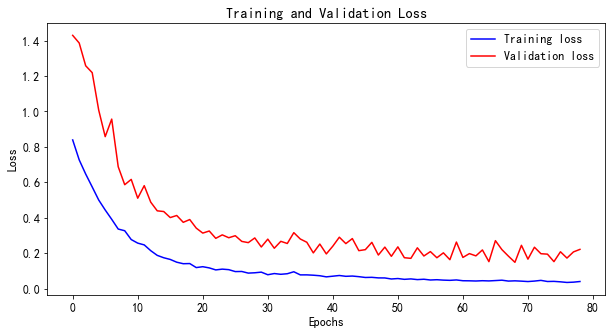

In [79]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure(figsize=(10,5))
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

visualize_loss(history, "Training and Validation Loss")

In [82]:
pred=model.predict(df_INPUT.values)
df_pred=pd.DataFrame(data=pred, columns=df_NUMERIC.columns)
df_pred

,SOC土壤有机碳,SIC土壤无机碳,STC土壤全碳,全氮N,土壤C/N比
0,-1.586104,1.503157,0.617937,-2.033414,1.848135
1,-1.026430,1.250666,0.717898,-0.308787,0.550795
2,-0.873693,1.606131,1.237960,-0.848379,1.675315
3,-1.402764,1.137063,0.309955,-0.800886,0.649982
4,-1.648549,0.532690,-0.541873,-1.288477,0.426046
5,-0.291817,2.364235,2.492734,0.318770,0.962220
6,-0.356808,-0.241098,-0.526627,-0.330043,-0.179907
7,-1.900570,0.556026,-0.688603,-0.571557,-0.210089
8,-0.714801,0.762188,0.380546,-0.280723,0.189396
9,-0.584379,1.259045,1.033084,-0.792892,1.251057


In [93]:
def plotPredGnd(name):
    return px.line(y=[df_pred[SOC], df_NUMERIC[SOC]]).update_layout(title=f'{name}预测值和真实值',legend_title='预测值/真实值')
    

In [94]:
plotPredGnd(SOC)

In [95]:
plotPredGnd(ALLN)